In [1]:
# все нужные библиотеки
# можете дополнить список если считаете нужным
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

### Проект:
Заказчик передал вам данные: суммы транзакции клиентов и какие-то признаки<br>
Все данные хранятся в файле train_dataset.csv, где суммы транзакций размещены под колонкой "int_target". Как вы уже догадались это и будет таргет который нам нужно будет предсказать.<br>
Не терпится начать? Мне тоже, но для начала вводная касательно этого проекта, тоже будет интересно.

Хотя перед вами стоит одна задача весь проект будет поделён на несколько подпунктов для вашего удобства.<br>
Каждый из подпунктов будет просить вас выполнить какое-то задание, но как вы его выполните будет зависеть только от вас. Ведь как вы уже
убедились в дата-саинсе, да и в целом питоне много разных подходов для одной проблемы.<br>

В целом вы можете написать полностью свой код, главное в итоге построить модель. А убедиться в том что ваша модель хороша нам поможет Kaggle.<br>
Да-да, в этом проекте вы сможете сдать свои результаты в Kaggle и получить свой балл.<br>
Ну, а теперь пора начинать

1) Для начала импортируйте данные из файла dataset.csv, назовите ваш датасет "dataset"

In [2]:
dataset = pd.read_csv("train_dataset.csv")

In [3]:
dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,int_target
0,-0.043457,-0.027918,1.473594,-10.309556,-1.000000,145.373247,0.001888,2.555947,-64.208613,0.470329,...,B,83.317907,85.385030,120.550153,59.736520,64.325558,107.833753,85.853573,104.466108,17353
1,-1.535978,0.999851,23.019753,38.430092,1.000000,-110.045207,2.359228,0.571917,-110.318854,-2.620978,...,D,114.881621,79.711086,68.505986,116.330797,75.365722,104.229006,90.842232,95.232654,1214
2,11.567708,0.608310,1.873323,6.412821,0.999995,-280.186852,133.811870,1.160380,-206.238816,-1.006502,...,B,145.833459,115.159171,64.417992,98.846694,66.381070,82.118547,96.837671,103.887599,16094
3,9.220074,0.999864,5.041939,-12.692120,-1.000000,164.773793,85.009772,-1.401234,92.624296,2.712139,...,C,98.150579,78.620349,120.176496,104.297092,89.318362,73.791588,71.870016,68.397346,24168
4,-3.025434,-0.594711,5.912259,-14.922129,-1.000000,9.546673,9.153251,-0.157479,-175.895074,-0.832795,...,C,94.519135,123.286154,75.458961,111.831234,111.871202,99.733563,100.697358,97.568328,1105


2. Сделайте предварительный анализ посмотрите на ваши данные:
сколько их, какого они типа, и какое их примерно распределение

In [4]:
# Basic information about the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   9000 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   9000 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   feature_9   9000 non-null   float64
 9   feature_10  9000 non-null   float64
 10  feature_11  9000 non-null   float64
 11  feature_12  9000 non-null   object 
 12  feature_13  9000 non-null   float64
 13  feature_14  9000 non-null   float64
 14  feature_15  9000 non-null   float64
 15  feature_16  9000 non-null   float64
 16  feature_17  9000 non-null   float64
 17  feature_18  9000 non-null   float64
 18  feature_19  9000 non-null   float64
 19  feature_20  9000 non-null  

In [5]:
# Descriptive statistics about the data
dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,int_target
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,9.892699,0.051539,13.691801,-5.280291,-0.190470,33.328407,353.997548,0.322612,-69.936887,-0.334325,0.328602,99.738087,99.862703,99.764452,99.958384,100.053203,100.209235,100.150711,99.819907,14962.016000
std,16.005016,0.708241,77.058634,26.814772,0.966878,193.282240,482.976481,1.928390,130.805512,1.802465,1.949699,19.970516,20.059934,19.816391,20.073887,20.005191,19.839667,20.084744,20.072153,8507.039575
min,-55.674815,-1.000000,0.002306,-90.266818,-1.000000,-782.730110,0.000032,-8.785694,-562.750841,-6.678488,-6.817115,23.296434,21.404151,20.462943,31.695377,25.278459,6.108243,29.523073,28.591199,501.000000
25%,-0.590266,-0.652740,0.891789,-24.131903,-1.000000,-88.607265,38.261808,-0.867972,-155.988559,-1.569338,-0.997933,86.416262,86.377084,86.184816,86.146061,86.513425,86.753705,86.684625,86.163540,7461.750000
50%,10.032527,0.108589,2.771781,-6.535842,-0.999996,47.154805,169.202144,0.454511,-80.249681,-0.374527,0.361400,99.753333,99.914720,99.938163,99.956294,99.644334,100.166669,100.179503,99.942090,14878.500000
75%,20.577624,0.750147,8.313018,12.151035,1.000000,165.882796,476.800547,1.636826,10.046369,0.874218,1.690059,113.192601,113.550065,113.274773,113.503300,113.486201,113.389489,113.657307,113.275163,22404.000000
max,71.408515,1.000000,4195.458665,96.967006,1.000000,689.183091,5099.175987,7.563691,454.622574,6.605742,7.314190,169.972815,169.211534,176.896232,180.756967,182.022092,173.917343,171.521586,178.220128,29631.000000


In [6]:
# Checking missing values
dataset.isna().sum()

feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
int_target    0
dtype: int64

In [7]:
# Checking duplicates
dataset.duplicated().sum()

0

3. Разделите ваш датасет на таргет и признаки, а также поделите ваш датасет на тренировочный и тестовый

In [8]:
X = dataset.drop(columns=['int_target'])
y = dataset['int_target']  

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Надеюсь вы заметили что у вас есть категориальный признак который имеет текстовый формат.<br>
Переведите этот признак в числовое значение

In [10]:
columns_to_encode = ['feature_12']
onehot_encoder = OneHotEncoder()
column_transformer = ColumnTransformer([('onehot_encoder', onehot_encoder, columns_to_encode)],
                                        remainder='passthrough')
X_encoded = column_transformer.fit_transform(X)
X_encoded_df = pd.DataFrame(X_encoded)
print(X_encoded_df.head())

    0    1    2    3          4         5          6          7         8   \
0  0.0  1.0  0.0  0.0  -0.043457 -0.027918   1.473594 -10.309556 -1.000000   
1  0.0  0.0  0.0  1.0  -1.535978  0.999851  23.019753  38.430092  1.000000   
2  0.0  1.0  0.0  0.0  11.567708  0.608310   1.873323   6.412821  0.999995   
3  0.0  0.0  1.0  0.0   9.220074  0.999864   5.041939 -12.692120 -1.000000   
4  0.0  0.0  1.0  0.0  -3.025434 -0.594711   5.912259 -14.922129 -1.000000   

           9   ...        13        14          15          16          17  \
0  145.373247  ...  0.470329  0.525065   83.317907   85.385030  120.550153   
1 -110.045207  ... -2.620978 -0.910418  114.881621   79.711086   68.505986   
2 -280.186852  ... -1.006502 -1.598523  145.833459  115.159171   64.417992   
3  164.773793  ...  2.712139  3.248977   98.150579   78.620349  120.176496   
4    9.546673  ... -0.832795 -0.565688   94.519135  123.286154   75.458961   

           18          19          20          21          22 

In [11]:
X = X_encoded_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Надеюсь вы заметили что масштабы наших признаков сильно разнятся.<br>
Давайте применим одно единое масштабирование на все наши признаки.

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6. Постройте модель линейной регрессии.<br>
Оцените модель с помощью метрики RMSE, а также покажите статистические метрики

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test_scaled)

In [16]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 6798.121052312861


In [17]:
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

sm_model = sm.OLS(y_train, X_train_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:             int_target   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     188.8
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:28:12   Log-Likelihood:                -73666.
No. Observations:                7200   AIC:                         1.474e+05
Df Residuals:                    7176   BIC:                         1.475e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.485e+04     79.300    187.296      0.0

### Апдейт задачи
Пришле заказчик и запросил текущий статус. Метрики RMSE ему сильно не понравились, около половины размаха всего таргета.<br>
Вы предпологаете, что задача регрессии слишком комплексна для текущего набора данных.<br>
Вы предложили, поделить таргет на классы, то есть не определять абсолютную сумму транзакций, а определять к какому классу этот клиент относится (высокодоходных, средний или низкодоходный).<br>
Заказчик показать как поделить на эти классы

7. Чтобы поделить таргет на классы давайте сначала посмотрим на распределение этого самого таргета

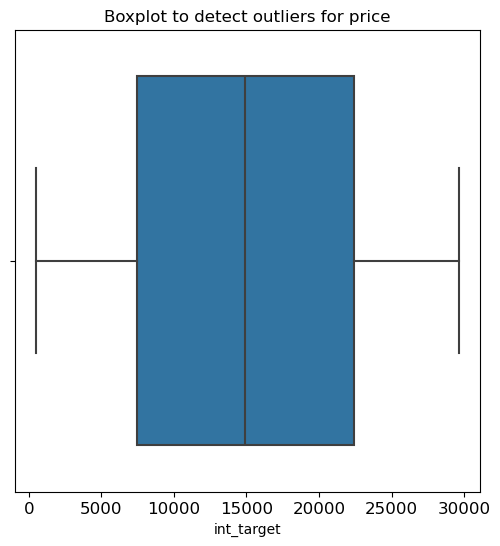

In [18]:
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for price', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=dataset['int_target'])
plt.show()

In [19]:
percentile25 = dataset['int_target'].quantile(0.25)
percentile75 = dataset['int_target'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

outliers = dataset[(dataset['int_target'] > upper_limit) | (dataset['int_target'] < lower_limit)]

print("Number of rows in the data containing outliers in target:", len(outliers))

Lower limit: -14951.625
Upper limit: 44817.375
Number of rows in the data containing outliers in target: 0


8. Думаю вы согласитесь что распределение выглядит равномерным то есть поделить мы можем на три равных класса.<br>
Для этого нам нужно посчитать соответствующие перцентили (33% и 67%)

In [20]:
percentile_33 = dataset['int_target'].quantile(0.33)
percentile_67 = dataset['int_target'].quantile(0.67)

In [21]:
print("33rd percentile: ",percentile_33)
print("67th percentile: ",percentile_67)

33rd percentile:  9871.67
67th percentile:  20120.66


9. Заказчик согласился на деление по классам по данным перцентире но предложил их округлить.<br>
Поэтому создайте новый таргет, по такой логике, все что ниже 10,000 это низкодоходный, а все что выше 20000 это высокодоходный, остальное соответсвенно средний класс

In [22]:
percentile_33 = int(percentile_33)
percentile_67 = int(percentile_67)

In [23]:
dataset['income_level'] = pd.cut(dataset['int_target'], bins=[-float('inf'), 10000, 20000, float('inf')],
                            labels=['Low Income', 'Medium Income', 'High Income'],
                            right=False)

print(dataset)

      feature_1  feature_2  feature_3  feature_4  feature_5   feature_6  \
0     -0.043457  -0.027918   1.473594 -10.309556  -1.000000  145.373247   
1     -1.535978   0.999851  23.019753  38.430092   1.000000 -110.045207   
2     11.567708   0.608310   1.873323   6.412821   0.999995 -280.186852   
3      9.220074   0.999864   5.041939 -12.692120  -1.000000  164.773793   
4     -3.025434  -0.594711   5.912259 -14.922129  -1.000000    9.546673   
...         ...        ...        ...        ...        ...         ...   
8995 -14.855160  -0.444750   5.014003   6.427379   0.999995 -117.145006   
8996   3.978782  -0.977872   4.424409 -12.647104  -1.000000  417.490199   
8997 -12.752882   0.877753   4.595519  -3.167490  -0.996460 -683.322309   
8998   5.848172  -0.113649  14.008038   9.070265   1.000000 -100.800044   
8999  -0.587002  -0.084128  19.426709  13.118624   1.000000    9.036669   

       feature_7  feature_8   feature_9  feature_10  ...  feature_13  \
0       0.001888   2.555947

10. Давайте теперь построим модель логистической регрессии она будет служить нам бэйзлайном, а также фильтром признаков.<br>
Для этого постройте модель с Lasso регуляризацией и коефициентом регуляризации 0.01.<br>
Оцените модель используя метрику accuracy

In [24]:
dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,int_target,income_level
0,-0.043457,-0.027918,1.473594,-10.309556,-1.000000,145.373247,0.001888,2.555947,-64.208613,0.470329,...,83.317907,85.385030,120.550153,59.736520,64.325558,107.833753,85.853573,104.466108,17353,Medium Income
1,-1.535978,0.999851,23.019753,38.430092,1.000000,-110.045207,2.359228,0.571917,-110.318854,-2.620978,...,114.881621,79.711086,68.505986,116.330797,75.365722,104.229006,90.842232,95.232654,1214,Low Income
2,11.567708,0.608310,1.873323,6.412821,0.999995,-280.186852,133.811870,1.160380,-206.238816,-1.006502,...,145.833459,115.159171,64.417992,98.846694,66.381070,82.118547,96.837671,103.887599,16094,Medium Income
3,9.220074,0.999864,5.041939,-12.692120,-1.000000,164.773793,85.009772,-1.401234,92.624296,2.712139,...,98.150579,78.620349,120.176496,104.297092,89.318362,73.791588,71.870016,68.397346,24168,High Income
4,-3.025434,-0.594711,5.912259,-14.922129,-1.000000,9.546673,9.153251,-0.157479,-175.895074,-0.832795,...,94.519135,123.286154,75.458961,111.831234,111.871202,99.733563,100.697358,97.568328,1105,Low Income


In [25]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,1.0,0.0,0.0,-0.043457,-0.027918,1.473594,-10.309556,-1.000000,145.373247,...,0.470329,0.525065,83.317907,85.385030,120.550153,59.736520,64.325558,107.833753,85.853573,104.466108
1,0.0,0.0,0.0,1.0,-1.535978,0.999851,23.019753,38.430092,1.000000,-110.045207,...,-2.620978,-0.910418,114.881621,79.711086,68.505986,116.330797,75.365722,104.229006,90.842232,95.232654
2,0.0,1.0,0.0,0.0,11.567708,0.608310,1.873323,6.412821,0.999995,-280.186852,...,-1.006502,-1.598523,145.833459,115.159171,64.417992,98.846694,66.381070,82.118547,96.837671,103.887599
3,0.0,0.0,1.0,0.0,9.220074,0.999864,5.041939,-12.692120,-1.000000,164.773793,...,2.712139,3.248977,98.150579,78.620349,120.176496,104.297092,89.318362,73.791588,71.870016,68.397346
4,0.0,0.0,1.0,0.0,-3.025434,-0.594711,5.912259,-14.922129,-1.000000,9.546673,...,-0.832795,-0.565688,94.519135,123.286154,75.458961,111.831234,111.871202,99.733563,100.697358,97.568328


In [26]:
y = dataset['income_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
model = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, penalty='l1', random_state=42, solver='liblinear')

In [29]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

In [30]:
print("Accuracy:", accuracy)

Accuracy: 0.7372222222222222


11. Посмотрите какие получились коэффициенты признаков у нашей модели

In [31]:
model.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.13172839,  0.        ,  0.        , -0.18833451,  0.        ,
        -0.16900935, -0.65495292,  0.39037161,  0.69533097,  0.13667018,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.41321808,
        -0.20016868,  0.        ,  1.14876408,  0.06652282, -0.1936392 ,
         0.        , -0.08669205, -0.59172123,  0.06819086, -0.80611041,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.2812767 ,
         0.        ,  0.        , -0.88181064,  0.        ,  0.40961828,
         0.        ,  0.80051461,  0.        , -0.79423279,  0.50221998,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

12. Что ж видимо признаки у которых коэффициенты по всем классам равны нулю нам не особо полезны.<br>
Давайте выберем только те признаки у которых коэффициент не ноль и создадим новый датасет признаков

In [32]:
selected_features = X.columns[model.coef_[0] != 0]
X_selected = X[selected_features]
X_selected.shape

(9000, 7)

13. Давайте посмотрим есть ли какая-то предсказательная способность у оставшихся признаков.<br>
Для этого примените principal component analysis и нарисуйте эти компоненты на графике с таргетом

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

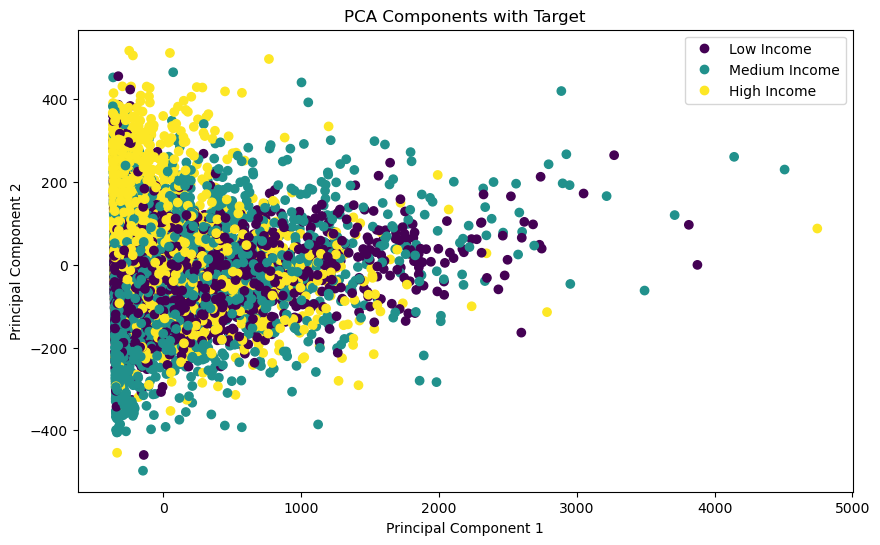

In [34]:
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components with Target')
plt.legend(handles=scatter.legend_elements()[0], labels=['Low Income', 'Medium Income', 'High Income'])
plt.show()

In [61]:
X_selected.head()

,5,8,10,11,12,13,14
0,-0.027918,-1.000000,0.001888,2.555947,-64.208613,0.470329,0.525065
1,0.999851,1.000000,2.359228,0.571917,-110.318854,-2.620978,-0.910418
2,0.608310,0.999995,133.811870,1.160380,-206.238816,-1.006502,-1.598523
3,0.999864,-1.000000,85.009772,-1.401234,92.624296,2.712139,3.248977
4,-0.594711,-1.000000,9.153251,-0.157479,-175.895074,-0.832795,-0.565688


14. Видимо что-то есть в этих признаках.<br>
Давайте теперь попробуем построить более комплексную модель, постройте любую модель основную на деревьях.<br>
Так же оцените вашу модель с помощью метрики accuracy

In [35]:
X = X_selected

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred_rf = rf_classifier.predict(X_test)

In [39]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf}')

Random Forest Classifier Accuracy: 0.7755555555555556


15. Давайте попробуем применить другой тип модели.<br>
Постройте SVM модель и оцените ее accuracy

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [42]:
y_pred = svm_model.predict(X_test_scaled)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7761111111111111


15. Давайте попробуем применить другой тип модели.<br>
Постройте KNN модель и оцените ее accuracy

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn_model.predict(X_test_scaled)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7572222222222222


In [47]:
label_map = {"Low Income": 0, "Medium Income": 1, "High Income": 2}
y_pred_int = np.vectorize(label_map.get)(y_pred)

In [48]:
# Create a DataFrame for submission
submission_df1 = pd.DataFrame({'ID': range(len(y_pred_int)), 'cat_target': y_pred_int})

In [49]:
submission_df = submission_df1[:1000]

In [50]:
print(len(submission_df))

1000


In [51]:
# Save the submission file
submission_df.to_csv('submission.csv', index=False)

### Отправляем работы
Ну чтож думаю вы попробовали разные модели, надеюсь вы находили лучшие гиперпараметры, ведь пора соревноваться в результатах.<br>
Для этого вам нужно скачать 'test_dataset.csv'<br>
Применить все преобразования что вы делали на стадии обучения модели<br>
Выбрать вашу лучшую модель и сделать предсказания классов для этого датасета<br>
Внимание ваш результат должен быть csv файлом состоящим из двух колонок: ID (от 0 до 999) и cat_target (ваши прогнозы 0/1/2)
Отправить свои результаты вы можете на соревнование Kaggle по ссылке: https://www.kaggle.com/t/6fcb93642fe949aa9c6fb7875fb1b64e<br>


In [52]:
test = y_test[:1000]
predic = y_pred[:1000]

In [53]:
accuracy = accuracy_score(test, predic)
print(f'Accuracy: {accuracy}')

Accuracy: 0.748


In [54]:
final = pd.read_csv("test_dataset.csv")

In [55]:
final.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,3.629075,0.817774,0.129687,6.219642,0.999992,-58.751555,13.170185,-2.265941,163.600359,-0.590149,1.724402,A,115.782973,102.383110,75.750290,82.670555,88.398872,78.034384,124.881643,130.904343
1,-23.283759,-0.086293,0.508258,-9.114238,-1.000000,39.000794,542.133433,3.903423,-35.206871,0.184453,0.352388,D,110.274900,82.267629,98.946475,93.449254,80.750636,70.362057,118.437830,88.459522
2,2.842355,-0.987547,1.525673,-10.430008,-1.000000,-92.206528,8.078982,0.329318,-180.770230,-0.204815,-0.648555,B,93.094432,91.407737,105.507571,135.199911,101.494074,105.644610,101.121831,93.372128
3,-22.069979,-0.158082,7.572780,3.447535,0.997977,-173.333256,487.083984,2.533396,-146.763360,-1.238702,-0.072297,B,137.142645,109.992174,80.176218,142.513692,127.017116,88.508838,118.327166,91.573769
4,-7.702941,0.421435,0.407912,-6.168170,-0.999991,84.132138,59.335303,-1.125035,153.894943,-0.039970,-2.440906,B,130.685865,92.336227,95.847169,114.405540,117.925669,115.024795,104.837486,115.718165


In [56]:
final.shape

(1000, 20)

In [57]:
final_columns_to_encode = ['feature_12']
onehot_encoder = OneHotEncoder()
final_column_transformer = ColumnTransformer([('onehot_encoder', onehot_encoder, final_columns_to_encode)],
                                        remainder='passthrough')
final_encoded = column_transformer.fit_transform(final)
final_encoded_df = pd.DataFrame(final_encoded)
print(final_encoded_df.head())

    0    1    2    3          4         5         6          7         8   \
0  1.0  0.0  0.0  0.0   3.629075  0.817774  0.129687   6.219642  0.999992   
1  0.0  0.0  0.0  1.0 -23.283759 -0.086293  0.508258  -9.114238 -1.000000   
2  0.0  1.0  0.0  0.0   2.842355 -0.987547  1.525673 -10.430008 -1.000000   
3  0.0  1.0  0.0  0.0 -22.069979 -0.158082  7.572780   3.447535  0.997977   
4  0.0  1.0  0.0  0.0  -7.702941  0.421435  0.407912  -6.168170 -0.999991   

           9   ...        13        14          15          16          17  \
0  -58.751555  ... -0.590149  1.724402  115.782973  102.383110   75.750290   
1   39.000794  ...  0.184453  0.352388  110.274900   82.267629   98.946475   
2  -92.206528  ... -0.204815 -0.648555   93.094432   91.407737  105.507571   
3 -173.333256  ... -1.238702 -0.072297  137.142645  109.992174   80.176218   
4   84.132138  ... -0.039970 -2.440906  130.685865   92.336227   95.847169   

           18          19          20          21          22  
0   

In [68]:
f_selected_columns = [5, 8, 10, 11, 12, 13, 14]
final_selected = final_encoded_df[f_selected_columns]

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(final_selected)

In [70]:
final_pred = knn_model.predict(X_test_scaled)

In [71]:
label_map = {"Low Income": 0, "Medium Income": 1, "High Income": 2}
y_pred_int = np.vectorize(label_map.get)(final_pred)

In [72]:
submission_df1 = pd.DataFrame({'ID': range(len(y_pred_int)), 'cat_target': y_pred_int})

In [73]:
submission_df = submission_df1[:1000]

In [74]:
print(len(submission_df))

1000
